# Capstone Final Project

In [1]:
#importing the needed libraries

import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json


import requests 
from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

!pip install folium
import folium 

print('Libraries imported.')

     |████████████████████████████████| 94 kB 5.3 MB/s  eta 0:00:01
Libraries imported.


# Identify tourist areas

The below code will help identfiy hotels around New York City Times Square. K-Means clustering will then be used to group the hotels into clusters. The center of the clusters will be used later in the analysis to find suitable locations for a restaurant. 

In [2]:
# 4 Square Log in info

CLIENT_ID = 'HM5GVXRKUWLHU4L1OVVKWHO5UQRZLSE1AVAETQ00ASVSUTNX' # your Foursquare ID
CLIENT_SECRET = 'UJDKZW5KYTOQLQ443P2C3FBNPKZVK1QCO05F2D4Q5H4CASIW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [4]:
# Setting search query parameters to look for hotels around the coordinates for Time Square in New York City. 

lat = 40.7580
lng = -73.9855
search_query = 'Hotel'
radius = 500
LIMIT = 50



In [5]:
#Create the URL to call
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=HM5GVXRKUWLHU4L1OVVKWHO5UQRZLSE1AVAETQ00ASVSUTNX&client_secret=UJDKZW5KYTOQLQ443P2C3FBNPKZVK1QCO05F2D4Q5H4CASIW&ll=40.758,-73.9855&v=20180605&query=Hotel&radius=500&limit=50'

In [6]:
#Make the call to 4Square API and save results in json file

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '600324c718aab40723cb47e0'},
 'response': {'venues': [{'id': '4d7ad1263fbf6dcbb60b6423',
    'name': 'Sanctuary Hotel New York',
    'location': {'address': '132 W 47th St',
     'crossStreet': 'btwn 6th & 7th Ave.',
     'lat': 40.75837,
     'lng': -73.9832957,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.75837,
       'lng': -73.9832957}],
     'distance': 190,
     'postalCode': '10036',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['132 W 47th St (btwn 6th & 7th Ave.)',
      'New York, NY 10036',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1610818760',
    'hasPerk': False},
   {'id': '4a9f

In [8]:
#Organize results into a datafram
hotels = results['response']['venues']
hotels_df = pd.json_normalize(hotels)
hotels_df.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,4d7ad1263fbf6dcbb60b6423,Sanctuary Hotel New York,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1610818760,False,132 W 47th St,btwn 6th & 7th Ave.,40.758370,-73.983296,"[{'label': 'display', 'lat': 40.75837, 'lng': ...",190,10036,US,New York,NY,United States,"[132 W 47th St (btwn 6th & 7th Ave.), New York...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4a9f2f6ff964a520d93c20e3,Kimpton Muse Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1610818760,False,130 W 46th St,btwn 6th & 7th Ave,40.757808,-73.983764,"[{'label': 'display', 'lat': 40.757808, 'lng':...",147,10036,US,New York,NY,United States,"[130 W 46th St (btwn 6th & 7th Ave), New York,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4a0215c6f964a5202a711fe3,Millennium Broadway Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1610818760,False,145 W 44th St,at Broadway,40.757073,-73.984800,"[{'label': 'display', 'lat': 40.757073, 'lng':...",118,10036,US,New York,NY,United States,"[145 W 44th St (at Broadway), New York, NY 100...",58446022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4b4bbe3ff964a52016a626e3,Hotel Edison,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1610818760,False,228 W 47th St,btwn 7th & 8th Ave,40.759666,-73.986088,"[{'label': 'display', 'lat': 40.75966639038906...",192,10036,US,New York,NY,United States,"[228 W 47th St (btwn 7th & 8th Ave), New York,...",501560524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,56d61e11498e4c3c305da704,Hotel Riu Plaza New York Times Square,"[{'id': '4bf58dd8d48988d12f951735', 'name': 'R...",v-1610818760,False,305 W 46th St,NaN,40.760179,-73.988029,"[{'label': 'display', 'lat': 40.76017910501307...",322,10036,US,New York,NY,United States,"[305 W 46th St, New York, NY 10036, United Sta...",NaN,Hell's Kitchen,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Cleansing data to contain oly hotel venues

filtered_columns = ['name', 'categories'] + [col for col in hotels_df.columns if col.startswith('location.')] + ['id']
hotels_df_filtered = hotels_df.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


hotels_df_filtered['categories'] = hotels_df_filtered.apply(get_category_type, axis=1)

hotels_df_filtered.columns = [column.split('.')[-1] for column in hotels_df_filtered.columns]

hotels_df_filtered = hotels_df_filtered[hotels_df_filtered.categories == 'Hotel']

hotels_df_filtered.reset_index(drop=True, inplace=True)

hotels_df_filtered




,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Sanctuary Hotel New York,Hotel,132 W 47th St,btwn 6th & 7th Ave.,40.758370,-73.983296,"[{'label': 'display', 'lat': 40.75837, 'lng': ...",190,10036,US,New York,NY,United States,"[132 W 47th St (btwn 6th & 7th Ave.), New York...",NaN,4d7ad1263fbf6dcbb60b6423
1,Kimpton Muse Hotel,Hotel,130 W 46th St,btwn 6th & 7th Ave,40.757808,-73.983764,"[{'label': 'display', 'lat': 40.757808, 'lng':...",147,10036,US,New York,NY,United States,"[130 W 46th St (btwn 6th & 7th Ave), New York,...",NaN,4a9f2f6ff964a520d93c20e3
2,Millennium Broadway Hotel,Hotel,145 W 44th St,at Broadway,40.757073,-73.984800,"[{'label': 'display', 'lat': 40.757073, 'lng':...",118,10036,US,New York,NY,United States,"[145 W 44th St (at Broadway), New York, NY 100...",NaN,4a0215c6f964a5202a711fe3
3,Hotel Edison,Hotel,228 W 47th St,btwn 7th & 8th Ave,40.759666,-73.986088,"[{'label': 'display', 'lat': 40.75966639038906...",192,10036,US,New York,NY,United States,"[228 W 47th St (btwn 7th & 8th Ave), New York,...",NaN,4b4bbe3ff964a52016a626e3
4,"The Algonquin Hotel, Autograph Collection",Hotel,59 W 44th St,NaN,40.755993,-73.982317,"[{'label': 'display', 'lat': 40.7559927, 'lng'...",349,10036,US,New York,NY,United States,"[59 W 44th St, New York, NY 10036, United States]",NaN,45f8e590f964a5203f441fe3
5,Night Hotel,Hotel,132 W 45th St,at Avenue of the Americas,40.757292,-73.984139,"[{'label': 'display', 'lat': 40.75729176565184...",139,10036,US,New York,NY,United States,"[132 W 45th St (at Avenue of the Americas), Ne...",NaN,44826b5af964a5201b341fe3
6,Room Mate Grace Hotel,Hotel,125 W 45th St,btw 6th & Broadway,40.757384,-73.983831,"[{'label': 'display', 'lat': 40.75738415178490...",156,10036,US,New York,NY,United States,"[125 W 45th St (btw 6th & Broadway), New York,...",NaN,49de39a9f964a52037601fe3
7,Renaissance New York Times Square Hotel,Hotel,"Two Times Square, 714 Seventh Avenue At W. 48t...",at W 48th St,40.759840,-73.984388,"[{'label': 'display', 'lat': 40.7598399, 'lng'...",225,10036,US,New York,NY,United States,"[Two Times Square, 714 Seventh Avenue At W. 48...",NaN,4a7d0598f964a5205aee1fe3
8,Night Hotel Times Square,Hotel,157 W 47th St,7th Avenue,40.759131,-73.983739,"[{'label': 'display', 'lat': 40.759131, 'lng':...",194,10036,US,New York,NY,United States,"[157 W 47th St (7th Avenue), New York, NY 1003...",NaN,5145c277e4b0cec0809bad8c
9,The Hotel @ Times Square,Hotel,59 W 46th St,btwn 5th & 6th Ave.,40.757219,-73.981261,"[{'label': 'display', 'lat': 40.75721917378145...",367,10036,US,New York,NY,United States,"[59 W 46th St (btwn 5th & 6th Ave.), New York,...",NaN,4a62333df964a5205cc31fe3


In [10]:
#Create a map to view the resulting hotels and their locations

hotels_map = folium.Map(location=[lat, lng], zoom_start=15) # Generate map centred around NYC Time Square

# Add the hotels as blue circle markers
for lat, lng, label in zip(hotels_df_filtered.lat, hotels_df_filtered.lng, hotels_df_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hotels_map)

# display map
hotels_map

In [11]:
hotels_df_filtered.shape

(34, 16)

In [12]:
#Organize dataframe for k-means clustering

id_n = list(range(1,len(hotels_df_filtered)+1))
hotels_df_filtered['id_n'] = id_n
hotels_df_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id,id_n
0,Sanctuary Hotel New York,Hotel,132 W 47th St,btwn 6th & 7th Ave.,40.758370,-73.983296,"[{'label': 'display', 'lat': 40.75837, 'lng': ...",190,10036,US,New York,NY,United States,"[132 W 47th St (btwn 6th & 7th Ave.), New York...",NaN,4d7ad1263fbf6dcbb60b6423,1
1,Kimpton Muse Hotel,Hotel,130 W 46th St,btwn 6th & 7th Ave,40.757808,-73.983764,"[{'label': 'display', 'lat': 40.757808, 'lng':...",147,10036,US,New York,NY,United States,"[130 W 46th St (btwn 6th & 7th Ave), New York,...",NaN,4a9f2f6ff964a520d93c20e3,2
2,Millennium Broadway Hotel,Hotel,145 W 44th St,at Broadway,40.757073,-73.984800,"[{'label': 'display', 'lat': 40.757073, 'lng':...",118,10036,US,New York,NY,United States,"[145 W 44th St (at Broadway), New York, NY 100...",NaN,4a0215c6f964a5202a711fe3,3
3,Hotel Edison,Hotel,228 W 47th St,btwn 7th & 8th Ave,40.759666,-73.986088,"[{'label': 'display', 'lat': 40.75966639038906...",192,10036,US,New York,NY,United States,"[228 W 47th St (btwn 7th & 8th Ave), New York,...",NaN,4b4bbe3ff964a52016a626e3,4
4,"The Algonquin Hotel, Autograph Collection",Hotel,59 W 44th St,NaN,40.755993,-73.982317,"[{'label': 'display', 'lat': 40.7559927, 'lng'...",349,10036,US,New York,NY,United States,"[59 W 44th St, New York, NY 10036, United States]",NaN,45f8e590f964a5203f441fe3,5


In [13]:
#Build dataset for k-means clustering
X=hotels_df_filtered.loc[:,['id_n','lat','lng']]
X.head()

,id_n,lat,lng
0,1,40.758370,-73.983296
1,2,40.757808,-73.983764
2,3,40.757073,-73.984800
3,4,40.759666,-73.986088
4,5,40.755993,-73.982317


In [14]:
#Build clusters using k-means and data above 
kmeans = KMeans(n_clusters = 3, init ='k-means++') # Hotels will be clustered in 3 groups
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
centers = kmeans.cluster_centers_
print(centers) #To show coordinates of the center for each cluster 
X.head()

[[ 40.76060888 -73.98503476]
 [ 40.75688772 -73.98343464]
 [ 40.75589013 -73.99102895]]


,id_n,lat,lng,cluster_label
0,1,40.758370,-73.983296,1
1,2,40.757808,-73.983764,1
2,3,40.757073,-73.984800,1
3,4,40.759666,-73.986088,0
4,5,40.755993,-73.982317,1


In [16]:
#Add the cluster label to each venue in the hotels data frame
X = X[['id_n','cluster_label']]
clustered_hotels = hotels_df_filtered.merge(X, left_on='id_n', right_on='id_n')
clustered_hotels.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id,id_n,cluster_label
0,Sanctuary Hotel New York,Hotel,132 W 47th St,btwn 6th & 7th Ave.,40.758370,-73.983296,"[{'label': 'display', 'lat': 40.75837, 'lng': ...",190,10036,US,New York,NY,United States,"[132 W 47th St (btwn 6th & 7th Ave.), New York...",NaN,4d7ad1263fbf6dcbb60b6423,1,1
1,Kimpton Muse Hotel,Hotel,130 W 46th St,btwn 6th & 7th Ave,40.757808,-73.983764,"[{'label': 'display', 'lat': 40.757808, 'lng':...",147,10036,US,New York,NY,United States,"[130 W 46th St (btwn 6th & 7th Ave), New York,...",NaN,4a9f2f6ff964a520d93c20e3,2,1
2,Millennium Broadway Hotel,Hotel,145 W 44th St,at Broadway,40.757073,-73.984800,"[{'label': 'display', 'lat': 40.757073, 'lng':...",118,10036,US,New York,NY,United States,"[145 W 44th St (at Broadway), New York, NY 100...",NaN,4a0215c6f964a5202a711fe3,3,1
3,Hotel Edison,Hotel,228 W 47th St,btwn 7th & 8th Ave,40.759666,-73.986088,"[{'label': 'display', 'lat': 40.75966639038906...",192,10036,US,New York,NY,United States,"[228 W 47th St (btwn 7th & 8th Ave), New York,...",NaN,4b4bbe3ff964a52016a626e3,4,0
4,"The Algonquin Hotel, Autograph Collection",Hotel,59 W 44th St,NaN,40.755993,-73.982317,"[{'label': 'display', 'lat': 40.7559927, 'lng'...",349,10036,US,New York,NY,United States,"[59 W 44th St, New York, NY 10036, United States]",NaN,45f8e590f964a5203f441fe3,5,1


In [17]:
#Map showing hotels based on designated cluster
map_clusters = folium.Map(location=[lat, lng], zoom_start=15)

# add markers to the map
marker_colors = ['red','green','blue']
for lat, lon, poi, cluster in zip(clustered_hotels['lat'], clustered_hotels['lng'], clustered_hotels['name'], clustered_hotels['cluster_label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=marker_colors[cluster],
        fill=True,
        fill_color=marker_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters #show map

In [18]:
#Putting the center of each cluster in a dataframe for later analysis
centers_df = pd.DataFrame(centers, columns =['c_lat', 'c_lon'])
cluster_label = list(range(0,3))
centers_df['cluster_label'] = cluster_label
centers_df

,c_lat,c_lon,cluster_label
0,40.760609,-73.985035,0
1,40.756888,-73.983435,1
2,40.755890,-73.991029,2


In [19]:
#map of centers
map_centers = folium.Map(location=[lat, lng], zoom_start=15)

# add markers to the map in different colors according to cluster
marker_colors = ['red','green','blue']
for lat, lon, poi, cluster in zip(centers_df['c_lat'], centers_df['c_lon'], centers_df['cluster_label'], centers_df['cluster_label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=marker_colors[cluster],
        fill=True,
        fill_color=marker_colors[cluster],
        fill_opacity=0.7).add_to(map_centers)
       
map_centers #display the map showing 3 markers, one for each cluster

# Restaurant detail

This section will look for trending venues around New York Time Square. Restaurant data will be extracted into a new dataframe and used to analyze trends in dining around Time Square. 

In [21]:
#Create new URL for call
limit_restaurants = 500

url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    limit_restaurants)
url2

'https://api.foursquare.com/v2/venues/explore?&client_id=HM5GVXRKUWLHU4L1OVVKWHO5UQRZLSE1AVAETQ00ASVSUTNX&client_secret=UJDKZW5KYTOQLQ443P2C3FBNPKZVK1QCO05F2D4Q5H4CASIW&v=20180605&ll=40.75589012757547,-73.98523609343836&radius=500&limit=500'

In [22]:
#Make call to FourSquare API
results2 = requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '6003293c71e86c414c3ee62a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Theater District',
  'headerFullLocation': 'Theater District, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 227,
  'suggestedBounds': {'ne': {'lat': 40.76039013207547,
    'lng': -73.97930656858664},
   'sw': {'lat': 40.75139012307547, 'lng': -73.99116561829008}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ec0a81fb6341cd41f1ef402',
       'name': 'Minskoff Theatre',
       'location': {'address': '1515 Broadway',
        'crossStreet': 'at W 45th St',
        'lat': 40.75738906224092,
        'ln

In [24]:
#Organize data into dataframe
restaurants = results2['response']['groups'][0]['items']   
restaurants_df = pd.json_normalize(restaurants) 

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
restaurants_df = restaurants_df.loc[:, filtered_columns]

# filter the category for each row
restaurants_df['venue.categories'] = restaurants_df.apply(get_category_type, axis=1)

# clean columns
restaurants_df.columns = [col.split(".")[-1] for col in restaurants_df.columns]

restaurants_df

,name,categories,lat,lng
0,Minskoff Theatre,Theater,40.757389,-73.985537
1,Hudson Theatre,Theater,40.756908,-73.984503
2,Belasco Theatre,Theater,40.756548,-73.983923
3,Books Kinokuniya,Bookstore,40.754053,-73.984649
4,Joe's Pizza,Pizza Place,40.754679,-73.987029
5,Whole Foods Market,Grocery Store,40.754507,-73.984299
6,Hyatt Centric Times Square New York,Hotel,40.757396,-73.984222
7,Lion King Broadway Musical,Concert Hall,40.757481,-73.985623
8,Equinox Bryant Park,Gym,40.754680,-73.985466
9,Aladdin @ New Amsterdam Theatre,Theater,40.757052,-73.987488


In [26]:
restaurants_df.shape

(100, 4)

In [28]:
#Isolate venues with categories containing "Restaurant"
restaurants_df_cleaned = restaurants_df[restaurants_df['categories'].str.contains('Restaurant')].reset_index(drop=True)
print(restaurants_df_cleaned.shape) #number of restaurants
restaurants_df_cleaned.head

(21, 4)


<bound method NDFrame.head of                             name                categories        lat  \
0          Bubba Gump Shrimp Co.        Seafood Restaurant  40.757207   
1                 Hard Rock Cafe          Theme Restaurant  40.757035   
2            OOTOYA 大戸屋 (OOTOYA)       Japanese Restaurant  40.754973   
3   Carmine’s Italian Restaurant        Italian Restaurant  40.757497   
4               Gabriel Kreuther         French Restaurant  40.754143   
5               Tony's Di Napoli        Italian Restaurant  40.756432   
6                         Margon          Cuban Restaurant  40.757865   
7                    Saju Bistro         French Restaurant  40.756617   
8             Xi’an Famous Foods        Chinese Restaurant  40.754969   
9                Osteria al Doge        Italian Restaurant  40.756824   
10                  Empanda Mama       Empanada Restaurant  40.754930   
11        Royal Grill Halal Food       American Restaurant  40.756188   
12                   

In [29]:
#Creating a map of restaurants
restaurants_map = folium.Map(location=[lat, lng], zoom_start=15) # generate map centred around London

# add the hotels as yellow circle markers
for lat, lng, label in zip(restaurants_df_cleaned.lat, restaurants_df_cleaned.lng, restaurants_df_cleaned.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(restaurants_map)

# display map
restaurants_map

In [31]:
#Preparing the data that will be used in KNN classification
Xhat=restaurants_df_cleaned.loc[:,['lat','lng']] #classification based on the location coordinates
print(Xhat.shape) #number of restaurants
Xhat.head() #show dataframe

(21, 2)


,lat,lng
0,40.757207,-73.986374
1,40.757035,-73.986611
2,40.754973,-73.986103
3,40.757497,-73.986779
4,40.754143,-73.983505


In [32]:
#Dataframe to be used for training KNN
centers_df

,c_lat,c_lon,cluster_label
0,40.760609,-73.985035,0
1,40.756888,-73.983435,1
2,40.755890,-73.991029,2


In [33]:
#Selecting classification features and target variable
X_train = centers_df[['c_lat', 'c_lon']].values
Y_train = centers_df['cluster_label']

In [34]:
#Importing KNN library
from sklearn.neighbors import KNeighborsClassifier

In [35]:
k = 1 #Classification based on the nearest center
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh

KNeighborsClassifier(n_neighbors=1)

In [36]:
#Classify the restaurants based on the model created
yhat = neigh.predict(Xhat)
yhat[0:5]

array([1, 1, 1, 1, 1])

In [37]:
#Putting the results in a dataframe
KNN_results = pd.DataFrame(yhat, columns=['class'])
KNN_results

,class
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [38]:
#Joining the results with the restaurants dataframe
restaurants_classified = pd.concat([restaurants_df_cleaned, KNN_results], axis=1, sort=False)

In [39]:
restaurants_classified

,name,categories,lat,lng,class
0,Bubba Gump Shrimp Co.,Seafood Restaurant,40.757207,-73.986374,1
1,Hard Rock Cafe,Theme Restaurant,40.757035,-73.986611,1
2,OOTOYA 大戸屋 (OOTOYA),Japanese Restaurant,40.754973,-73.986103,1
3,Carmine’s Italian Restaurant,Italian Restaurant,40.757497,-73.986779,1
4,Gabriel Kreuther,French Restaurant,40.754143,-73.983505,1
5,Tony's Di Napoli,Italian Restaurant,40.756432,-73.985504,1
6,Margon,Cuban Restaurant,40.757865,-73.983976,1
7,Saju Bistro,French Restaurant,40.756617,-73.984239,1
8,Xi’an Famous Foods,Chinese Restaurant,40.754969,-73.982497,1
9,Osteria al Doge,Italian Restaurant,40.756824,-73.984860,1


In [41]:
#Create map of restaurants
map_rest_class = folium.Map(location=[lat, lng], zoom_start=15)

# add markers to the map
marker_colors = ['red','green','blue']
for lat, lon, poi, cluster in zip(restaurants_classified['lat'], restaurants_classified['lng'], restaurants_classified['name'], restaurants_classified['class']):
    label = folium.Popup(str(poi) + ' Class ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=marker_colors[cluster],
        fill=True,
        fill_color=marker_colors[cluster],
        fill_opacity=0.7).add_to(map_rest_class)
       
map_rest_class

# Finding the best location and type of cuisine

This section will anlayze the trending restaurants around Time Square. Category will help identify which restaurants are popular. The data can also show which clusters are higher or lower in competition. 



In [42]:
#Count number of restaurants in each cluster
restaurants_count = restaurants_classified['class'].value_counts().rename_axis('class').reset_index(name='counts')
restaurants_count

,class,counts
0,1,17
1,2,3
2,0,1


In [43]:
#Counting number of trending restaurants of each unique category
trending_restaurants = restaurants_classified['categories'].value_counts().rename_axis('categories').reset_index(name='counts')
trending_restaurants

,categories,counts
0,American Restaurant,4
1,Italian Restaurant,3
2,Seafood Restaurant,2
3,French Restaurant,2
4,Japanese Restaurant,1
5,Indian Restaurant,1
6,Chinese Restaurant,1
7,Fast Food Restaurant,1
8,Theme Restaurant,1
9,Sushi Restaurant,1


In [44]:
#Keep the five most frequent categories
trending_restaurants = trending_restaurants.head()
trending_restaurants

,categories,counts
0,American Restaurant,4
1,Italian Restaurant,3
2,Seafood Restaurant,2
3,French Restaurant,2
4,Japanese Restaurant,1


In [45]:
trending_restaurants = trending_restaurants.set_index('categories')
trending_restaurants

,counts
categories,
American Restaurant,4
Italian Restaurant,3
Seafood Restaurant,2
French Restaurant,2
Japanese Restaurant,1


In [46]:
# Import bar charts library
import matplotlib as mpl
import matplotlib.pyplot as plt

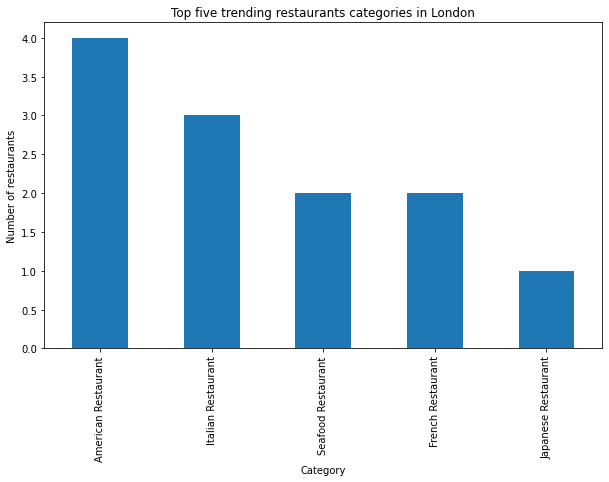

In [47]:
#Create chart
trending_restaurants.plot(kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Number of restaurants') # add y-label to the plot
plt.title('Top five trending restaurants categories in London') # add title to the plot

plt.show()

In [48]:
#Count hotels in each area to evaluate potential
hotels_count = clustered_hotels['cluster_label'].value_counts().rename_axis('cluster').reset_index(name='counts')
hotels_count

,cluster,counts
0,1,19
1,0,13
2,2,2
